In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns


In [2]:
# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# resample the dataset
from sklearn.utils import resample
from sklearn.utils import shuffle

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


# import the XGBoost function for classification
from xgboost import XGBClassifier

import random

In [3]:
# load the csv file
df_employee = pd.read_csv('emp_attrition.csv')

# display the first five observations
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [4]:
# calculate the first quartile
Q1 = df_employee.quantile(0.25)

#calculate the third quartile
Q3 = df_employee.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# remove the outliers from the dataframe
df_employee = df_employee[~((df_employee < (Q1 - 1.5 * IQR)) | (df_employee > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_employee.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if sys.path[0] == '':


(1487, 18)

In [5]:
# reset the row index
df_employee = df_employee.reset_index(drop=True)

In [6]:
# store the target variable "Attrition" in a dataframe 'df_target'
df_target = df_employee['Attrition']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column "Attrition" using drop()
# 'axis = 1' drops the specified column
df_feature = df_employee.drop('Attrition', axis = 1)

In [7]:
# if the value in the target variable is 'Yes' then replace it with 1 else with 0
for i in range(len(df_target)):
    if df_target[i] == 'Yes':
        df_target[i] = 1
    else:
        df_target[i] = 0
        
# change the datatype of the target variable to integer
df_target = df_target.astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

In [9]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'OverTime'],
      dtype='object')

In [10]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [11]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num, dummy_var], axis = 1)

# display first five observations
X.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33,3,1,3,1,1,3348,1,11,3,...,1,0,0,0,0,0,1,0,0,1
1,32,4,4,1,3,4,10400,1,11,3,...,1,0,0,0,0,0,0,1,0,0
2,40,9,4,3,1,1,2018,3,14,3,...,1,0,1,0,0,0,0,0,0,0
3,42,7,2,4,2,2,2372,6,16,3,...,0,0,0,0,0,0,1,0,0,1
4,43,27,3,3,3,1,10820,8,11,3,...,0,0,0,0,1,0,0,0,0,0


In [12]:
# iterating a for loop 
# categorizing the variable 'Age'
for i in range(X.shape[0]):
    if X.Age[i]>=18 and X.Age[i]<=30:
        X.Age[i] = "A18-30"
    elif(X.Age[i]>=31 and X.Age[i]<=40):
        X.Age[i] = "A31-40"
    elif(X.Age[i]>=41 and X.Age[i]<=50):
        X.Age[i] = "A41-50"
    else:
        X.Age[i] = "A51-60"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
# group the dataframe by 'Age'
grp = X.groupby('Age')

# find out the maximum value from the column MonthlyIncome for each age group
grp.MonthlyIncome.max()

Age
A18-30    11935
A31-40    12061
A41-50    11957
A51-60    10976
Name: MonthlyIncome, dtype: int64

In [14]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
X = pd.get_dummies(data = X, drop_first = True)
X.head()

,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,Age_A31-40,Age_A41-50,Age_A51-60
0,3,1,3,1,1,3348,1,11,3,10,...,0,0,0,1,0,0,1,1,0,0
1,4,4,1,3,4,10400,1,11,3,14,...,0,0,0,0,1,0,0,1,0,0
2,9,4,3,1,1,2018,3,14,3,5,...,0,0,0,0,0,0,0,1,0,0
3,7,2,4,2,2,2372,6,16,3,1,...,0,0,0,1,0,0,1,0,1,0
4,27,3,3,3,1,10820,8,11,3,8,...,0,1,0,0,0,0,0,0,1,0


In [17]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)



X_train (1189, 32)
y_train (1189,)
X_test (298, 32)
y_test (298,)


11. Build gradient boosting model with 100 estimators and max depth 3. Also find accuracy

In [21]:
gb_model = GradientBoostingClassifier()

In [22]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [23]:
ypred_gb = gb_model.predict(X_test)

In [24]:
accuracy_score(y_test, ypred_gb) ##adaboost 84%

0.889261744966443

12. Find the best hyperparameters

In [25]:
tuned_param = [{ 'n_estimators' : [100,120,150,200,250,300,350],
'learning_rate': [0.1, 0.01,0.001,0.15,0.015],
'max_depth' : [2,3,4,5,6]}]

In [26]:
gb_grid = GridSearchCV(estimator= gb_model,
                       param_grid = tuned_param,
                       cv = 3,
                       n_jobs = -1)

In [27]:
gb_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                          'max_depth': [2, 3, 4, 5, 6],
                          'n_estimators': [100, 120, 150, 200, 250, 300, 350]}])

In [28]:
gb_grid.best_params_

{'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 350}

In [29]:
gb_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                          'max_depth': [2, 3, 4, 5, 6],
                          'n_estimators': [100, 120, 150, 200, 250, 300, 350]}])

In [30]:
ypred_gb_cv = gb_grid.predict(X_test)

In [31]:
accuracy_score(y_test, ypred_gb_cv)

0.9395973154362416

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, ypred_gb_cv)

Text(0.02, 0.8, "('Acc Score :', 0.94)")

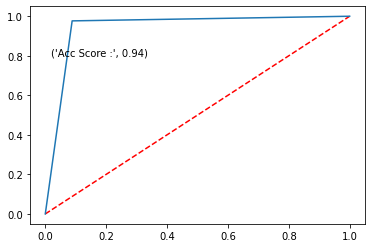

In [37]:
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.text(x=0.02, y = 0.8, s=('Acc Score :', round(metrics.roc_auc_score(y_test, ypred_gb_cv),2)))

In [38]:
cm = confusion_matrix(y_test, ypred_gb_cv)
cm

array([[155,  15],
       [  3, 125]])

#Extreme Gradient Boosting

In [ ]:
#15. Build the XGBoost model with a learning rate of 0.01 and gamma equal to 2. Calculate the roc_auc score and generate a classification rerport.

In [39]:
xgb_model = XGBClassifier(learning_rate = 0.01, gamma = 2)

In [40]:
xgb_model.fit(X_train,y_train)

XGBClassifier(gamma=2, learning_rate=0.01)

In [42]:
ypred_xgb = xgb_model.predict(X_test)

In [43]:
accuracy_score(y_test, ypred_xgb)

0.761744966442953

In [44]:
roc_auc_score(y_test, ypred_xgb)

0.750643382352941

In [55]:
cm = confusion_matrix(y_test, ypred_xgb)
cm

array([[141,  29],
       [ 42,  86]])

In [46]:
print(classification_report(y_test, ypred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       170
           1       0.75      0.67      0.71       128

    accuracy                           0.76       298
   macro avg       0.76      0.75      0.75       298
weighted avg       0.76      0.76      0.76       298



16. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the extreme gradient boosting full model
n_estimators = [100, 120, 150],
    learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
    gamma = [2, 3, 4, 5, 6],
    max_depth = [2, 3, 4, 5, 6]

In [48]:
tuned_param =[{'n_estimators':[100, 120, 150], 
               'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
               'gamma' : [2, 3, 4, 5, 6],
               'max_depth':[2, 3, 4, 5, 6]

    
}]

In [50]:
xgb_grid=GridSearchCV(estimator = xgb_model,
                       param_grid = tuned_param,
                       cv = 3,
                       n_jobs = -1)

In [51]:
xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(gamma=2, learning_rate=0.01),
             n_jobs=-1,
             param_grid=[{'gamma': [2, 3, 4, 5, 6],
                          'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                          'max_depth': [2, 3, 4, 5, 6],
                          'n_estimators': [100, 120, 150]}])

In [52]:
xgb_grid.best_params_

{'gamma': 2, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 100}

In [53]:
ypred_xgb_cv = xgb_grid.predict(X_test)

In [ ]:
#	17. Plot the connfusion matrix for tuned extreme gradient boosting model built in question 16

In [54]:
cm = confusion_matrix(y_test, ypred_xgb_cv)
cm

array([[145,  25],
       [  3, 125]])

In [ ]:
#18. Plot the area under the receiver operating characteristic curve for tuned extreme gradient boosting model built in question 16.

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, ypred_xgb_cv)

Text(0.02, 0.9, "('AUC:', 0.91)")

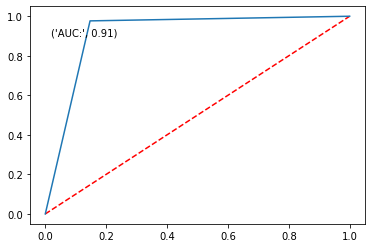

In [65]:
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.text(x=0.02, y=0.9,s=('AUC:',round(roc_auc_score(y_test, ypred_xgb_cv),2)))

In [ ]:
#19. Use the stacking technique with the decision tree and Random Forest model as base learners. 
#Consider the Adaboost model as a final estimator. Also, compute the ROC-AUC score of the model.

In [66]:
base_learners =[('Decision Tree', DecisionTreeClassifier()),
                ('Random Forest', RandomForestClassifier())]

In [67]:
stack_classifier_adaboost = StackingClassifier(estimators = base_learners, final_estimator= AdaBoostClassifier(random_state = 10))

In [68]:
stack_classifier_adaboost.fit(X_train, y_train)

StackingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                               ('Random Forest', RandomForestClassifier())],
                   final_estimator=AdaBoostClassifier(random_state=10))

In [69]:
y_pred = stack_classifier_adaboost.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       170
           1       0.99      0.94      0.96       128

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



In [ ]:
#20. Use the stacking technique with the decision tree and Random Forest model as base learners. 

#Consider the Gradient Boosting model as a final estimator. Also plot ROC_AUC

In [72]:
stack_classifier_xgboost = StackingClassifier(estimators = base_learners, 
                                               final_estimator= GradientBoostingClassifier(random_state = 10))

In [73]:
stack_classifier_xgboost.fit(X_train, y_train)

StackingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                               ('Random Forest', RandomForestClassifier())],
                   final_estimator=GradientBoostingClassifier(random_state=10))

In [74]:
y_pred = stack_classifier_xgboost.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       170
           1       0.97      0.96      0.96       128

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



In [76]:
roc_auc_score(y_test, y_pred) # ROC SCore

0.9687040441176471

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred) # Plot

Text(0.1, 0.9, "('AUC:', 0.97)")

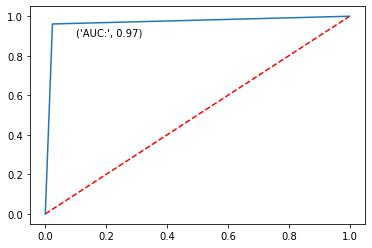

In [82]:
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.text(x=0.1, y=0.9, s= ('AUC:', round(roc_auc_score(y_test, y_pred),2)))